## Using Biopython to produce Phylogenetic trees from Multiple Sequence Alignments

This notebook shows the steps of creating a 'distance matrix' from a multiple sequence alignment and producing a phylogenetic tree from that. 

The example sequences used are tRNA sequences from the human reference genome. There is an introduction to the sequences further down this notebook. 

## setup
Run this set-up cell.

In [2]:
import copy
from io import StringIO
%matplotlib inline

We need to have Biopython installed and available, so lets check:

In [4]:
# import the Phylogeny class from BioPython to check it works
try:
    from Bio import Phylo
    print('Success Biopython import works')
except ModuleNotFoundError:
    print('ERROR Biopython not available you will need to install it')

Success Biopython import works


If you use conda it is easy to install Biopython by 
```
conda install biopython
```
or it can be installed using pip
```
pip install biopython
```

In [20]:
# this cell will try a conda install of biopython
# it should work on azure
# https://notebooks.azure.com/help/jupyter-notebooks/package-installation
try:
    from Bio import Phylo
except ModuleNotFoundError:
    !conda install biopython -y

In [7]:
# run this cell for the  the Biopython imports we will use.
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import *
from Bio import AlignIO

## Thr tRNA example sequence alignment

Transfer RNA is a very important class of macromolecules - tRNAs transfer amino acids to the growing protein polypeptide chain at the active site of the ribosome. By recognizing the codon (three-nucleotide 'word' )in the messenger RNA they ensure that the amino-acid coded by that is added. 

The correct amino acid is attached to the transfer-RNA by a specialized enzyme called an amino-acyl tRNA synthetase.

You know that there are more than one codon for some amino acids. For example Thr threonine is specified by three codons in the standard genetic code: ACU, ACC, ACA, and ACG. The final position is not important in the code as any nucleotide would apparently give Thr. This is called the 'wobble' base. 

There are only three classes of Thr tRNAs in humans for ACA (AGT), ACG (CGT), and ACA (TGT) (where the second sequence is the anticodon - the reverse complement of the codon). The final expected tRNA for ACC (GGT) does not occur and this codon is read by one of the others using non-standard base pairing at the 'wobble' position. 

Because tRNA is needed in large amounts there are multiple copies of tRNA genes in most organisms. In humans there is a total of 400 or so and they are scattered around the genome. 

There are 20 tRNA Thr genes in the human reference genome. The alignment here is of just 6 representative ones covering the three classes (prepared using the MUSCLE multiple alignment program).

The sequences here are the mature sequences of the RNAs. Remember that the Thymidine nucleotide (base Thymine) in the gene sequence is replaced with Uridine (base Uracil) in the final molecule. There are also many crucial modified bases in mature tRNAs but we are ignoring these complications.

Read in the example file human-Thr-tRNA-mature-examples.afa

In [8]:
aln = AlignIO.read('human-Thr-tRNA-mature-examples.afa', 'fasta')

In [9]:
print(aln)

SingleLetterAlphabet() alignment with 6 rows and 74 columns
GGCUCCGUAGCUUAGUUGGUUAAAGCGCCUGUCUAGUAAACAGG...CCU h_tRNA-Thr-AGT-3-1
GGCUCUAUGGCUUAGUUGGUUAAAGCGCCUGUCUCGUAAACAGG...CCU h_tRNA-Thr-CGT-1-1
GGCUCUAUGGCUUAGUUGGUUAAAGCGCCUGUCUUGUAAACAGG...CCU h_tRNA-Thr-TGT-1-1
GGCUCCAUAGCUCAG-UGGUUAGAGCACUGGUCUUGUAAACCAG...CCU h_tRNA-Thr-TGT-2-1
GGCUCCAUAGCUCAG-GGGUUAGAGCGCUGGUCUUGUAAACCAG...CCU h_tRNA-Thr-TGT-3-1
GGCUCCAUAGCUCAG-GGGUUAGAGCACUGGUCUUGUAAACCAG...CCU h_tRNA-Thr-TGT-4-1


In [10]:
calculator = DistanceCalculator('identity')

Here the distance calculator is set up to use a simple identity comparison among the sequences. You can maybe see that there are not very many differences among the sequences. This is because they are all from humans and need to function with the same enzymes to accept the amino acid.

Unlike the previous similarity calculations using identity, here the identity is being used to highlight differences between the sequences as these can be used directly as distances. The identity calculation is expressed as a fractional difference over all the columns in common to the sequences. 

After the calculator is created with the model, simply use the get_distance() method to get the distance matrix of a given alignment object. Then you will get a DistanceMatrix object.

In [11]:
dm = calculator.get_distance(aln)

In [12]:
dm

DistanceMatrix(names=['h_tRNA-Thr-AGT-3-1', 'h_tRNA-Thr-CGT-1-1', 'h_tRNA-Thr-TGT-1-1', 'h_tRNA-Thr-TGT-2-1', 'h_tRNA-Thr-TGT-3-1', 'h_tRNA-Thr-TGT-4-1'], matrix=[[0], [0.06756756756756754, 0], [0.10810810810810811, 0.05405405405405406, 0], [0.28378378378378377, 0.28378378378378377, 0.29729729729729726, 0], [0.28378378378378377, 0.28378378378378377, 0.29729729729729726, 0.05405405405405406, 0], [0.29729729729729726, 0.29729729729729726, 0.29729729729729726, 0.05405405405405406, 0.027027027027026973, 0]])

In [13]:
print(dm)

h_tRNA-Thr-AGT-3-1	0
h_tRNA-Thr-CGT-1-1	0.06756756756756754	0
h_tRNA-Thr-TGT-1-1	0.10810810810810811	0.05405405405405406	0
h_tRNA-Thr-TGT-2-1	0.28378378378378377	0.28378378378378377	0.29729729729729726	0
h_tRNA-Thr-TGT-3-1	0.28378378378378377	0.28378378378378377	0.29729729729729726	0.05405405405405406	0
h_tRNA-Thr-TGT-4-1	0.29729729729729726	0.29729729729729726	0.29729729729729726	0.05405405405405406	0.027027027027026973	0
	h_tRNA-Thr-AGT-3-1	h_tRNA-Thr-CGT-1-1	h_tRNA-Thr-TGT-1-1	h_tRNA-Thr-TGT-2-1	h_tRNA-Thr-TGT-3-1	h_tRNA-Thr-TGT-4-1


Remember that distance-based methods were just one of the approaches to constructing a phylogenetic tree from a set of aligned sequences.

Check back to see what the other two approaches were called. 

Within the group of distance-based methods there were a number of different algorithms for creating a tree.

The Biopython Phylo module has a DistanceTreeConstructor. This can use either the neighbour-joining (nj) or unweighted pair group method (upgma). The method to be applied is given as a string parameter.

In [14]:
constructor = DistanceTreeConstructor(calculator, 'upgma')

In [15]:
tree = constructor.build_tree(aln)

The UPGMA algorithm should give a rooted tree. The NJ algorithm would give an unrooted tree. 

The Phylo module has a hierarchical Tree object that uses the phylogenetic term 'Clade' for groups.

It takes the sequence names as the labels of the 'leaf' nodes of the tree.

The tree also has branching nodes - inner nodes - which are given default names by the constructor.

In [16]:
print(tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.11782094594594594, name='Inner2')
            Clade(branch_length=0.013513513513513542, name='Inner1')
                Clade(branch_length=0.013513513513513487, name='h_tRNA-Thr-TGT-4-1')
                Clade(branch_length=0.013513513513513487, name='h_tRNA-Thr-TGT-3-1')
            Clade(branch_length=0.02702702702702703, name='h_tRNA-Thr-TGT-2-1')
        Clade(branch_length=0.10092905405405406, name='Inner4')
            Clade(branch_length=0.016891891891891886, name='Inner3')
                Clade(branch_length=0.02702702702702703, name='h_tRNA-Thr-TGT-1-1')
                Clade(branch_length=0.02702702702702703, name='h_tRNA-Thr-CGT-1-1')
            Clade(branch_length=0.043918918918918914, name='h_tRNA-Thr-AGT-3-1')


The module has a simple ascii method for representing the tree across the output window. 

In [17]:
Phylo.draw_ascii(tree)

                                                      _____ h_tRNA-Thr-TGT-4-1
                                                 ____|
  ______________________________________________|    |_____ h_tRNA-Thr-TGT-3-1
 |                                              |
 |                                              |__________ h_tRNA-Thr-TGT-2-1
_|
 |                                               __________ h_tRNA-Thr-TGT-1-1
 |                                        ______|
 |_______________________________________|      |__________ h_tRNA-Thr-CGT-1-1
                                         |
                                         |_________________ h_tRNA-Thr-AGT-3-1



There is also a nicer graphic view available. 

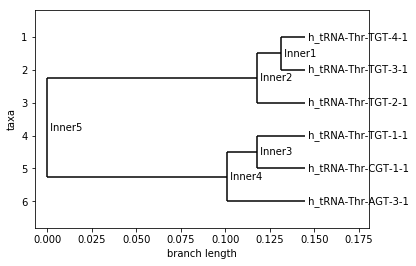

In [18]:
Phylo.draw(tree)

Looking at the anticodon labels for these tRNA groupings, do you notice anything interesting? 